In [1]:
#! pip install mlxtend


In [2]:
#! pip install lightgbm

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

#models
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import lightgbm as lgb
from lightgbm import LGBMRegressor


# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Misc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000


In [4]:
#data_con=pd.read_excel("concrete.xls")
data_slump=pd.read_csv("slump_test.data")

In [5]:
#data_con.head()

In [6]:
#data_con.info()

In [7]:

df_slump=data_slump.copy()

In [8]:
df_slump.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [9]:
df_slump.describe()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,52.000000,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.039417
std,29.877528,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.838232
min,1.000000,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,26.500000,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,52.000000,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,77.500000,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,103.000000,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


In [20]:
def correlation_heatmap_concrete(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    #plt.title('concrete Correlation of Features', y=1.05, size=15)


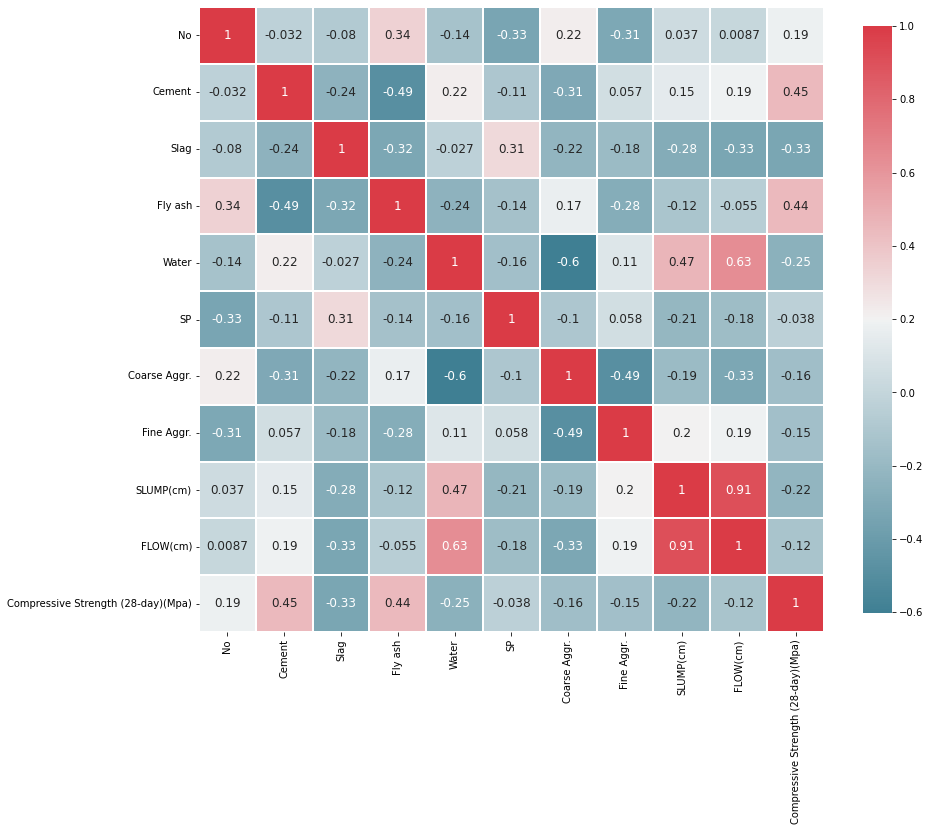

In [21]:
correlation_heatmap_concrete(data_slump)

In [22]:
df_comp_cs=data_slump.copy()

In [23]:
df_comp_cs=df_comp_cs.rename(columns={"Compressive Strength (28-day)(Mpa)":"CS (28-day)(Mpa)"})

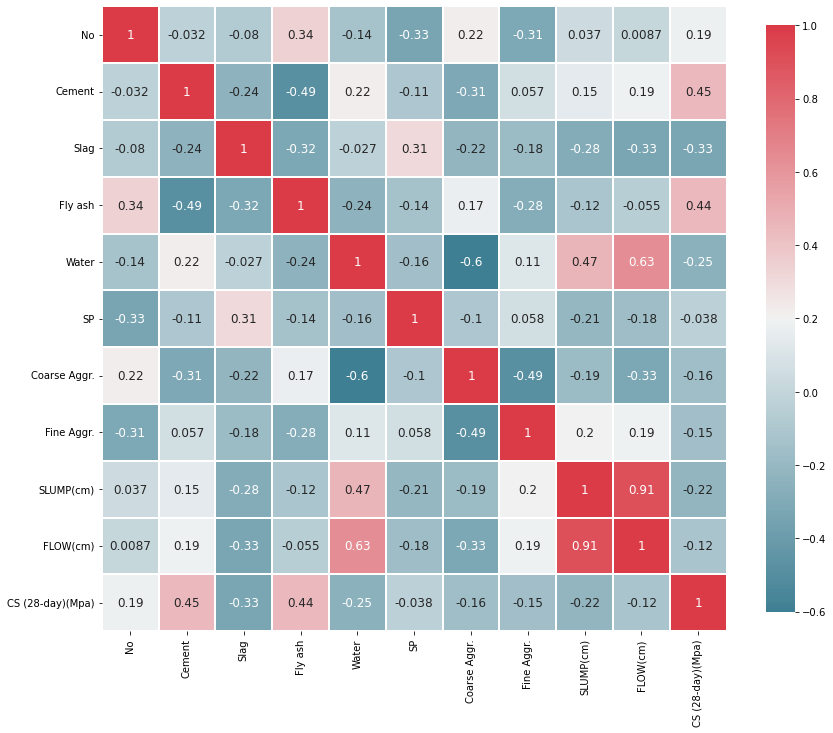

In [25]:
correlation_heatmap_concrete(df_comp_cs)

In [ ]:
X_1 = df_slump.drop(['SLUMP(cm)','FLOW(cm)','No'],1) 

In [ ]:
X_2 = df_slump.drop(['SLUMP(cm)','Compressive Strength (28-day)(Mpa)','No'],1) 

In [ ]:
X_3 = df_slump.drop(['FLOW(cm)','Compressive Strength (28-day)(Mpa)','No'],1) 

In [ ]:
correlation_heatmap_concrete(X_1)

In [ ]:
correlation_heatmap_concrete(X_2)

In [ ]:
correlation_heatmap_concrete(X_3)

In [ ]:
df_slump.columns

In [ ]:
def skew(df):
    sns.set_style("white")
    sns.set_color_codes(palette='deep')
    for i in df.columns:
        f, ax = plt.subplots(figsize=(8, 7))
        sns.distplot(df[i], color="b");
        ax.xaxis.grid(False)
        ax.set(ylabel="Frequency")
        ax.set(xlabel=i)
        ax.set(title=f"{i} distribution")
        sns.despine(trim=True, left=True)
        plt.savefig(r"C:\Users\enesa\DATA SCİENTİST\makale_gokhan_bey\RESİMLER\distribution{}.png".format(i))
        plt.show()
       
        # Skew and kurt
        print(f"{i} Skewness: %f" % df[i].skew())
        
        print(f"{i} Kurtosis: %f" % df[i].kurt())
        

In [ ]:
skew(df_slump)

In [ ]:
df_slump.columns[0:]

In [ ]:
skew_list=[]
for col in df_slump.columns:
    skew_list.append(df_slump[col].skew())
    
skew_dict=dict(zip(list(df_slump.columns),skew_list))

In [ ]:
kur_list=[]
for col in df_slump.columns:
    kur_list.append(df_slump[col].kurt())
    
kur_dict=dict(zip(list(df_slump.columns),kur_list))

In [ ]:
skew_dict

In [ ]:
kur_dict

In [ ]:
skew_df=pd.DataFrame.from_dict(skew_dict,orient="index",columns=["Skewness"])
kur_df=pd.DataFrame.from_dict(kur_dict,orient="index",columns=["Kurtosis"])

In [ ]:
skew_df

In [ ]:
kur_df

In [ ]:
skew_kurt=pd.concat([skew_df,kur_df],axis=1)

In [ ]:
skew_kurt